<a href="https://colab.research.google.com/github/kalnikos/Cervical-image-segmentation-model/blob/main/pap_smear_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from zipfile import ZipFile
file_name = "/content/servical+folder.zip"

with ZipFile(file_name,"r") as zip:
  zip.extractall()
  print("Done")

Done


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [17]:
DATADIR = "/content/servical+folder/Data_pap_smear"
CATEGORIES = ["abnormal", "normal"]

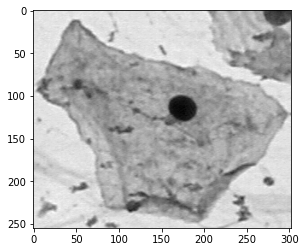

In [18]:
IMG_SIZE = 60
training_data = []
def creating_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                plt.imshow(img_array, cmap="gray")
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
creating_data()  

# New Section

In [19]:
training_data[1:5]

[[array([[229, 231, 231, ..., 112, 112, 116],
         [228, 230, 225, ..., 113, 111, 116],
         [224, 220, 218, ..., 117, 114, 115],
         ...,
         [236, 236, 236, ..., 217, 214, 205],
         [240, 237, 240, ..., 199, 204, 202],
         [244, 240, 239, ..., 191, 199, 204]], dtype=uint8), 0],
 [array([[182, 179, 175, ..., 148, 149, 150],
         [188, 187, 182, ..., 147, 149, 151],
         [195, 190, 185, ..., 145, 150, 154],
         ...,
         [145, 145, 142, ..., 152, 153, 155],
         [144, 143, 143, ..., 155, 154, 155],
         [146, 143, 142, ..., 155, 157, 158]], dtype=uint8), 0],
 [array([[189, 191, 192, ..., 195, 194, 187],
         [188, 194, 193, ..., 197, 191, 188],
         [188, 192, 194, ..., 196, 188, 186],
         ...,
         [129, 131, 130, ..., 177, 179, 179],
         [128, 130, 129, ..., 175, 177, 174],
         [133, 131, 130, ..., 170, 173, 171]], dtype=uint8), 0],
 [array([[ 61,  59,  60, ..., 108, 108, 108],
         [ 62,  62,  62, ..

# New Section

In [20]:
print(len(training_data))

2191


In [21]:
## Shuffle the data set
import random
random.shuffle(training_data)

In [22]:
## Creating a feature array and the target array
X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array(Y).reshape(-1,1)

## Verify the lenght 
print(len(X))
print(len(Y))

2191
2191


In [23]:
## Splitting the data into training and test set and scale the pixel intensities down to the 0-1 by dividing them by 255.0
X_train, X_test = X[:2000]/255.0, X[2000:]/250.0
y_train, y_test = Y[:2000], Y[2000:]

In [24]:
print(X_train.shape)
print(y_train.shape)

(2000, 60, 60, 1)
(2000, 1)


In [25]:
## Developing a Convolutional Neural Network
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [42]:

history = model.fit(X_train, y_train, batch_size=200, epochs=10, validation_split=0.3)

Epoch 1/10
7/7 [==============================] - 75s 11s/step - loss: 0.6952 - accuracy: 0.5643 - val_loss: 0.6530 - val_accuracy: 0.8100
Epoch 2/10
7/7 [==============================] - 74s 11s/step - loss: 0.5710 - accuracy: 0.8029 - val_loss: 0.4874 - val_accuracy: 0.7567
Epoch 3/10
7/7 [==============================] - 77s 11s/step - loss: 0.4401 - accuracy: 0.7921 - val_loss: 0.3606 - val_accuracy: 0.8383
Epoch 4/10
7/7 [==============================] - 74s 11s/step - loss: 0.3767 - accuracy: 0.8443 - val_loss: 0.3722 - val_accuracy: 0.8233
Epoch 5/10
7/7 [==============================] - 74s 11s/step - loss: 0.3870 - accuracy: 0.8379 - val_loss: 0.3441 - val_accuracy: 0.8450
Epoch 6/10
7/7 [==============================] - 74s 11s/step - loss: 0.3794 - accuracy: 0.8407 - val_loss: 0.3448 - val_accuracy: 0.8417
Epoch 7/10
7/7 [==============================] - 74s 11s/step - loss: 0.3601 - accuracy: 0.8450 - val_loss: 0.3327 - val_accuracy: 0.8417
Epoch 8/10
7/7 [===========

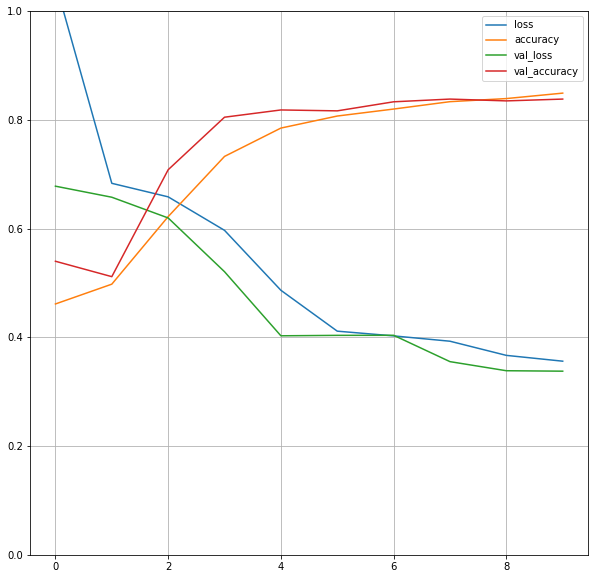

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
## Let's use Tensorboard to analyze the model
from tensorflow.keras.callbacks import TensorBoard

Name = "Normal Abnormal cells"
tensorboard = TensorBoard(log_dir="logs/{}".format(Name))

In [27]:
## Le's now increase the epochs to 20 and examine the results with the tensorborad 
history = model.fit(X_train, y_train, batch_size=200, epochs=20, validation_split=0.3, callbacks=[tensorboard])

Epoch 1/20
1/7 [===>..........................] - ETA: 0s - loss: 0.6950 - accuracy: 0.4800WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
7/7 [==============================] - 66s 9s/step - loss: 0.6940 - accuracy: 0.4850 - val_loss: 0.6566 - val_accuracy: 0.6383
Epoch 2/20
7/7 [==============================] - 67s 10s/step - loss: 0.5905 - accuracy: 0.7286 - val_loss: 0.5519 - val_accuracy: 0.7383
Epoch 3/20
7/7 [==============================] - 65s 9s/step - loss: 0.4422 - accuracy: 0.8186 - val_loss: 0.4179 - val_accuracy: 0.8050
Epoch 4/20
7/7 [==============================] - 65s 9s/step - loss: 0.3546 - accuracy: 0.8414 - val_loss: 0.4096 - val_accuracy: 0.8167
Epoch 5/20
7/7 [==============================] - 65s 9s/step - loss: 0.3556 - accuracy: 

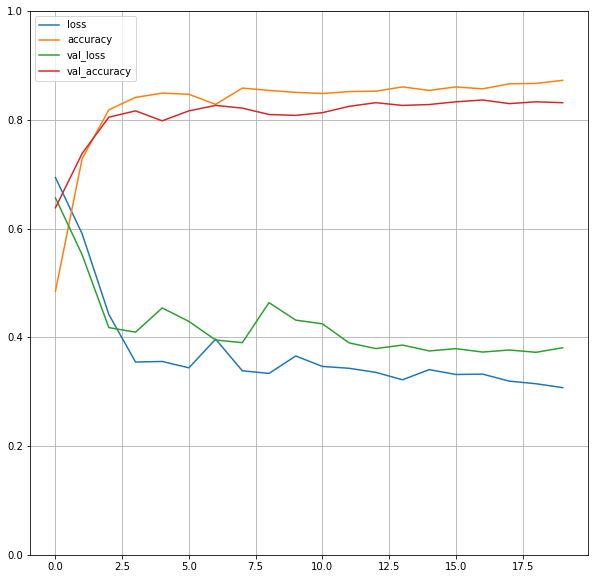

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
